<a href="https://colab.research.google.com/github/hasanberatozturkk/veri-analizi-projesi/blob/main/Grup11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
def veri_inceleme(dosya_adi):
  global my_frame
  try:
    my_frame=pd.read_csv(dosya_adi)
    print("Dosya Başarıyla Yüklendi.")
  except FileNotFoundError:
    print(f"{dosya_adi} adlı dosya bulunamadı.")
    return

  # dosyadaki verilerin ilk 5 satırını görüntüleme
  print(my_frame.head(5))
  print("-"*50)

  # dosyadaki veriler hakkında genel bilgi
  my_frame.info()
  print("-"*50)

  # dosyada toplam kaç tane veri satırı olduğunu görüntüleme
  print(f"dosyada toplam {my_frame.shape[0]} tane veri satırı vardır.")
  print("-"*50)

  # dosyadaki eksik verilerin tespit edilmesi
  eksik_veriler=my_frame.isnull().sum()
  print(eksik_veriler[eksik_veriler > 0])

  if eksik_veriler.sum() > 0:
    print(f"Toplam {eksik_veriler.sum()} tane eksik veri vardır.Bu eksik verilerin doldurulması gerekmektedir.")
  else:
    print("Dosyada eksik veri(NaN) bulunamadı.")
  print("-"*50)

  # dosyadaki veri sütunlarının sayısal istatiksel özeti
  print(my_frame.describe())
  print("-"*50)

veri_inceleme('/content/Sleep_health.csv')

Dosya Başarıyla Yüklendi.
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1       

In [108]:
# Alan adlarını  yeniden adlandırma
my_frame.rename(columns={
    'Age': 'Yaş',
    'Gender': 'Cinsiyet',
    'Occupation': 'Meslek',
    'Sleep Duration': 'Uyku Süresi',
    'Quality of Sleep': 'Uyku Kalitesi',
    'Physical Activity Level': 'Fiziksel Aktivite Düzeyi',
    'Stress Level': 'Stres Seviyesi',
    'BMI Category': 'BMI Kategorisi',
    'Heart Rate': 'Kalp Atış Hızı',
    'Daily Steps': 'Günlük Adım Sayısı',
    'Sleep Disorder': 'Uyku Bozukluğu'
}, inplace=True)
my_frame

,Person ID,Cinsiyet,Yaş,Meslek,Uyku Süresi,Uyku Kalitesi,Fiziksel Aktivite Düzeyi,Stres Seviyesi,BMI Kategorisi,Blood Pressure,Kalp Atış Hızı,Günlük Adım Sayısı,Uyku Bozukluğu
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [109]:
#  Eksik Değerleri Doldurma ('Sleep Disorder')
my_frame['Uyku Süresi']=my_frame['Uyku Süresi'].fillna('Yok')
my_frame['Uyku Kalitesi']=my_frame['Uyku Kalitesi'].fillna(random.randint(1,10))
my_frame

,Person ID,Cinsiyet,Yaş,Meslek,Uyku Süresi,Uyku Kalitesi,Fiziksel Aktivite Düzeyi,Stres Seviyesi,BMI Kategorisi,Blood Pressure,Kalp Atış Hızı,Günlük Adım Sayısı,Uyku Bozukluğu
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [110]:
# query-1(Sütun başlıklarını ve ilk veri setlerini görme)
my_frame.head()

,Person ID,Cinsiyet,Yaş,Meslek,Uyku Süresi,Uyku Kalitesi,Fiziksel Aktivite Düzeyi,Stres Seviyesi,BMI Kategorisi,Blood Pressure,Kalp Atış Hızı,Günlük Adım Sayısı,Uyku Bozukluğu
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [111]:
# query-2(Eksik verileri doldurduktan sonra kontrol etme)
my_frame.isnull().sum()

,0
Person ID,0
Cinsiyet,0
Yaş,0
Meslek,0
Uyku Süresi,0
Uyku Kalitesi,0
Fiziksel Aktivite Düzeyi,0
Stres Seviyesi,0
BMI Kategorisi,0
Blood Pressure,0


In [112]:
# query-3(Verilerin temel istatistiklerini görme)
my_frame.describe()

,Person ID,Yaş,Uyku Süresi,Uyku Kalitesi,Fiziksel Aktivite Düzeyi,Stres Seviyesi,Kalp Atış Hızı,Günlük Adım Sayısı
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [113]:
# query-4(Veri setinde kaç farklı meslek olduğunu gösterme)
my_frame['Meslek'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [114]:
# query-5(Cinsiyete göre ortalama stres seviyesini bulma)
my_frame.groupby('Cinsiyet')['Stres Seviyesi'].mean()

,Stres Seviyesi
Cinsiyet,
Female,4.675676
Male,6.079365


In [115]:
# query-6(Seçilen kategoride hangi veri setinin fazla olduğunu bulma)
my_frame['BMI Kategorisi'].value_counts()

,count
BMI Kategorisi,
Normal,195
Overweight,148
Normal Weight,21
Obese,10


In [116]:
# query-7(Mesleklere göre uyku süresi sıralaması bulma)
my_frame.groupby('Meslek')['Uyku Süresi'].mean().sort_values()

,Uyku Süresi
Meslek,
Sales Representative,5.900000
Scientist,6.000000
Salesperson,6.403125
Teacher,6.690000
Software Engineer,6.750000
Manager,6.900000
Doctor,6.970423
Nurse,7.063014
Accountant,7.113514


In [117]:
# query-8(Uyku süresi ile yaş arasındaki ilişkinin korelasyon ölçüsü)
my_frame['Uyku Süresi'].corr(my_frame['Yaş'])

np.float64(0.34470935816474396)

In [118]:
# query-9(Kategoriye göre ortalama kalp hızı)
my_frame.groupby('BMI Kategorisi')['Kalp Atış Hızı'].mean()

,Kalp Atış Hızı
BMI Kategorisi,
Normal,68.728205
Normal Weight,71.285714
Obese,84.300000
Overweight,70.945946


In [119]:
# query-10(Uyku bozukluğuna göre en düşük ortalama uyku kalitesi değeri)
my_frame.groupby('Uyku Bozukluğu')['Uyku Kalitesi'].mean().sort_values()

,Uyku Kalitesi
Uyku Bozukluğu,
Insomnia,6.532468
Sleep Apnea,7.205128


In [120]:
# query-11(BMI Kategorisinin uyku seviyesi ve stresle ilişkisi)
my_frame.groupby('BMI Kategorisi')[['Uyku Kalitesi', 'Stres Seviyesi']].mean()

,Uyku Kalitesi,Stres Seviyesi
BMI Kategorisi,,
Normal,7.661538,5.128205
Normal Weight,7.428571,5.190476
Obese,6.400000,5.700000
Overweight,6.898649,5.729730


In [121]:
# query-12(Fiziksel aktivitesi fazla olanların ortalama uyku süresini hesaplama)
my_frame[my_frame['Günlük Adım Sayısı']>1000]['Uyku Süresi'].mean()

np.float64(7.132085561497325)

In [122]:
# query-13(Stres seviyesi fazla olanların hangi yaş grubunda yoğunlaştığını bulma)
my_frame[my_frame['Stres Seviyesi']>7]['Yaş'].value_counts()

,count
Yaş,
50,19
32,11
33,11
49,9
29,6
28,5
51,3
31,3
34,2


In [123]:
# query-13(Cinsiyet ve uyku süresi kategorilerini birleştirerek ortalama stres seviyesini bulduk)
my_new_frame=my_frame.pivot_table(index='Cinsiyet', columns='Uyku Süresi', values='Stres Seviyesi',aggfunc='mean')
my_new_frame.fillna(random.randint(0,7), inplace=True) #non olan alanlara random değerler girdik
my_new_frame

Uyku Süresi,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,...,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5
Cinsiyet,,,,,,,,,,,,,,,,,,,,,
Female,8.0,8.0,8.0,7.866667,7.333333,1.0,7.0,5.0,4.666667,4.0,...,1.0,1.000000,1.00,4.000000,3.0,3.153846,3.0,3.0,3.0,3.0
Male,1.0,8.0,8.0,7.800000,8.000000,7.0,7.0,7.0,7.000000,5.0,...,5.4,5.583333,5.25,5.666667,1.0,3.000000,1.0,1.0,1.0,1.0


In [124]:
# query-14(Sağlıklı bireylerin ortalama fiziksel aktivite düzeyini hesaplama)
my_frame[my_frame['BMI Kategorisi']=='Normal']['Fiziksel Aktivite Düzeyi'].mean()

np.float64(57.69230769230769)

In [125]:
# query-15(Cinsiyete göre gruplayıp günlük adım sayısında standart sapmayı bulma)
my_frame.groupby('Cinsiyet')['Günlük Adım Sayısı'].std()

,Günlük Adım Sayısı
Cinsiyet,
Female,1733.377493
Male,1500.589212


In [126]:
# query-16(BMI Kategorisi obese olanların uyku süresinin medyanını bulma)
my_frame[my_frame['BMI Kategorisi']=='Obese']['Uyku Süresi'].median()

7.3

In [127]:
# query-17(Kalp Atış Hızı 70 ile 80 arasında olanları filtreleme)
my_frame[my_frame['Kalp Atış Hızı'].between(70,80)]

,Person ID,Cinsiyet,Yaş,Meslek,Uyku Süresi,Uyku Kalitesi,Fiziksel Aktivite Düzeyi,Stres Seviyesi,BMI Kategorisi,Blood Pressure,Kalp Atış Hızı,Günlük Adım Sayısı,Uyku Bozukluğu
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,310,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia
310,311,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia
311,312,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia
339,340,Female,55,Nurse,8.1,9,75,4,Overweight,140/95,72,5000,Sleep Apnea


In [128]:
# query-18(Meslek kategorisinde en az 15 kere görülen meslekleri filtreleme)
meslek_sayisi=my_frame['Meslek'].value_counts()
my_frame[my_frame['Meslek'].isin(meslek_sayisi[meslek_sayisi >=15].index)]

,Person ID,Cinsiyet,Yaş,Meslek,Uyku Süresi,Uyku Kalitesi,Fiziksel Aktivite Düzeyi,Stres Seviyesi,BMI Kategorisi,Blood Pressure,Kalp Atış Hızı,Günlük Adım Sayısı,Uyku Bozukluğu
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [129]:
# query-19(Uyku süresi sütunundakini değerleri 60 ile çarparak dakikaya dönüştürme ve yeni sütun oluşturma)
my_frame['Uyku_Dakika']=my_frame['Uyku Süresi']*60
my_frame[['Uyku Süresi','Uyku_Dakika']].head(5)

,Uyku Süresi,Uyku_Dakika
0,6.1,366.0
1,6.2,372.0
2,6.2,372.0
3,5.9,354.0
4,5.9,354.0


In [130]:
# query-20(Uyku Kalitesi ve Stres Seviyesi arasındaki Korelasyonu hesaplama)
my_frame['Uyku Kalitesi'].corr(my_frame['Stres Seviyesi'])

np.float64(-0.8987520310040437)

In [131]:
# query-21(Veri setini yaş sütununa göre küçükten büyüğe sıralama(ilk 10 satır))
my_frame.sort_values(by='Yaş').head(10)

,Person ID,Cinsiyet,Yaş,Meslek,Uyku Süresi,Uyku Kalitesi,Fiziksel Aktivite Düzeyi,Stres Seviyesi,BMI Kategorisi,Blood Pressure,Kalp Atış Hızı,Günlük Adım Sayısı,Uyku Bozukluğu,Uyku_Dakika
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,366.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,372.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,372.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,354.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,354.0
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,354.0
17,18,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,Sleep Apnea,360.0
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea,390.0
12,13,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN,366.0
13,14,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,NaN,360.0


In [132]:
# query-22(Mesleklerin uyku kalitesi dağılımını standart sapma ile hesaplama)
my_frame.groupby('Meslek')['Uyku Kalitesi'].std().sort_values(ascending=False)

,Uyku Kalitesi
Meslek,
Software Engineer,1.914854
Nurse,1.550151
Scientist,1.154701
Doctor,0.757790
Engineer,0.754234
Teacher,0.659740
Accountant,0.458487
Lawyer,0.311661
Sales Representative,0.000000


In [133]:
# query-23(Yaş Grubu'na göre gruplayıp hem Kalp Atış Hızının ortalamasını hem de Günlük Adım Sayısının standart sapmasını bulma.)
my_frame.groupby('Yaş').agg({'Kalp Atış Hızı':'mean','Günlük Adım Sayısı':'std'})

,Kalp Atış Hızı,Günlük Adım Sayısı
Yaş,,
27,77.000000,NaN
28,81.000000,3834.057903
29,72.461538,1831.000847
30,71.230769,1464.581852
31,70.277778,1154.530717
32,71.176471,1414.213562
33,72.615385,187.766904
34,81.000000,0.000000
35,68.500000,1379.146640


In [134]:
# query-24(Fiziksel Aktivite Düzeyi ve Günlük Adım Sayısı arasındaki Korelasyonu hesaplama)
my_frame['Fiziksel Aktivite Düzeyi'].corr(my_frame['Günlük Adım Sayısı'])

np.float64(0.7727230504529325)

In [135]:
# query-25(Yaş ve BMI Kategorisinde belirli bir listedeki (25, 30, 35 yaşları) ve ('Obese', 'Overweight') kategorisindeki kişileri filtreleme)
my_frame[my_frame['Yaş'].isin([25,30,35]) & my_frame['BMI Kategorisi'].isin(['Obese', 'Overweight'])]

,Person ID,Cinsiyet,Yaş,Meslek,Uyku Süresi,Uyku Kalitesi,Fiziksel Aktivite Düzeyi,Stres Seviyesi,BMI Kategorisi,Blood Pressure,Kalp Atış Hızı,Günlük Adım Sayısı,Uyku Bozukluğu,Uyku_Dakika
82,83,Male,35,Teacher,6.7,7,40,5,Overweight,128/84,70,5600,NaN,402.0
83,84,Male,35,Teacher,6.7,7,40,5,Overweight,128/84,70,5600,NaN,402.0
93,94,Male,35,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea,444.0


In [136]:
# query-26(Uyku Kalitesi 7 ve üstü olan kişilerin, toplam veri setinin yüzde kaçını oluşturduğunu bulma)
my_frame[my_frame['Uyku Kalitesi']>=7].shape[0]/my_frame.shape[0]*100

68.71657754010695

In [137]:
#query-27(Fiziksel Aktivite Düzeyi 60'ın altında olan ve Uyku Kalitesi 7'nin üstünde olan kişileri filtreleme. (Düşük aktiviteye rağmen iyi uyuyanlar))
my_frame.query('`Fiziksel Aktivite Düzeyi` < 60 and `Uyku Kalitesi` > 7')

,Person ID,Cinsiyet,Yaş,Meslek,Uyku Süresi,Uyku Kalitesi,Fiziksel Aktivite Düzeyi,Stres Seviyesi,BMI Kategorisi,Blood Pressure,Kalp Atış Hızı,Günlük Adım Sayısı,Uyku Bozukluğu,Uyku_Dakika
50,51,Male,32,Engineer,7.5,8,45,3,Normal,120/80,70,8000,NaN,450.0
51,52,Male,32,Engineer,7.5,8,45,3,Normal,120/80,70,8000,NaN,450.0
66,67,Male,32,Accountant,7.2,8,50,6,Normal Weight,118/76,68,7000,NaN,432.0
161,162,Female,40,Accountant,7.2,8,55,6,Normal Weight,119/77,73,7300,NaN,432.0
162,163,Female,40,Accountant,7.2,8,55,6,Normal Weight,119/77,73,7300,NaN,432.0
279,280,Female,50,Engineer,8.3,9,30,3,Normal,125/80,65,5000,NaN,498.0
298,299,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN,510.0
299,300,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN,510.0
300,301,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN,510.0
301,302,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN,510.0


In [138]:
# query-28(Cinsiyet'e göre gruplayarak Kalp Atış Hızının Standart Sapmasını (std) bulma.)
my_frame.groupby('Cinsiyet')['Kalp Atış Hızı'].std()

,Kalp Atış Hızı
Cinsiyet,
Female,4.431573
Male,3.621354


Grafik Görselleştirmeleri

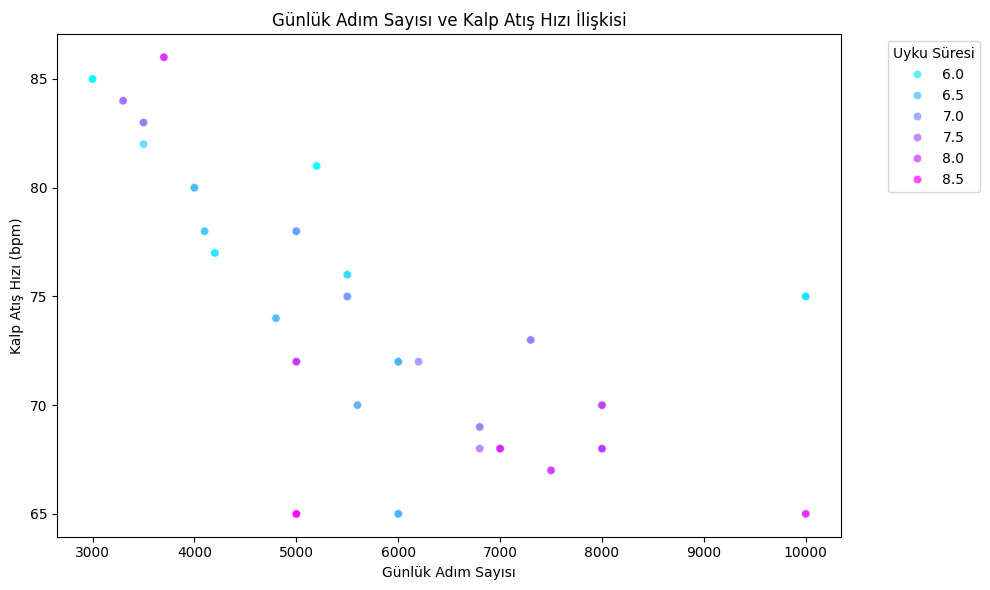

In [139]:
#g-1(Günlük Adım Sayısı ve Kalp Atış Hızı Korelasyonu)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Günlük Adım Sayısı', y='Kalp Atış Hızı', hue='Uyku Süresi', data=my_frame, palette='cool', alpha=0.7)
plt.title('Günlük Adım Sayısı ve Kalp Atış Hızı İlişkisi')
plt.xlabel('Günlük Adım Sayısı')
plt.ylabel('Kalp Atış Hızı (bpm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Uyku Süresi')
plt.tight_layout()
plt.show()
plt.savefig('adim_kalp_hizi.png')
plt.close()

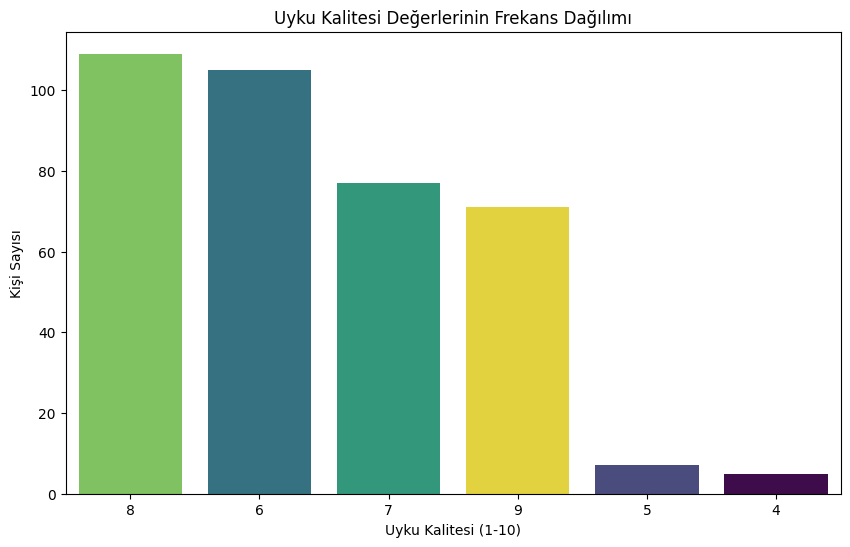

In [140]:
#g-2(Uyku Kalitesi Dağılımı)
plt.figure(figsize=(10, 6))
sns.countplot(x='Uyku Kalitesi',
              hue='Uyku Kalitesi',
              data=my_frame,
              palette='viridis',
              order=my_frame['Uyku Kalitesi'].value_counts().index,
              legend=False)
plt.title('Uyku Kalitesi Değerlerinin Frekans Dağılımı')
plt.xlabel('Uyku Kalitesi (1-10)')
plt.ylabel('Kişi Sayısı')
plt.show()
plt.savefig('uyku_kalitesi_dagilimi.png')
plt.close()

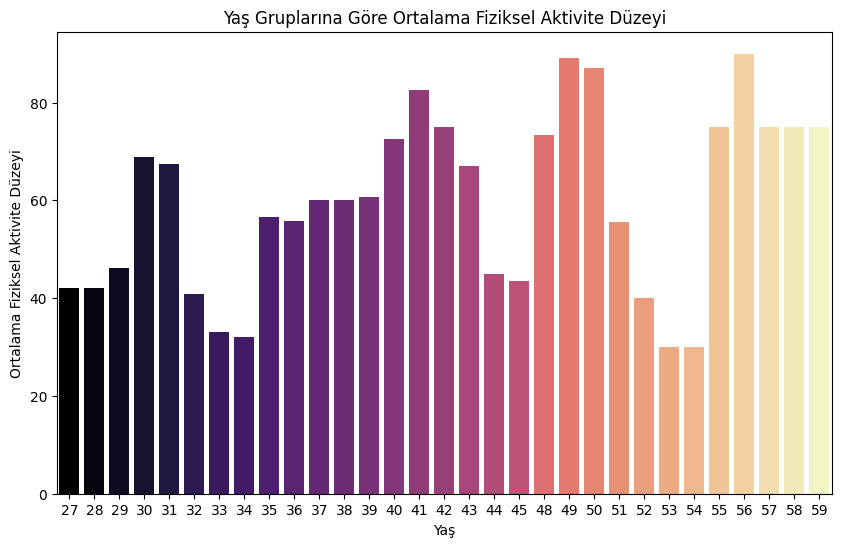

In [141]:
#g-3(Yaş Gruplarına Göre Ortalama Fiziksel Aktivite Düzeyi)
plt.figure(figsize=(10,6))
sns.barplot(x='Yaş',
            y='Fiziksel Aktivite Düzeyi',
            hue='Yaş',
            data=my_frame.groupby('Yaş')['Fiziksel Aktivite Düzeyi'].mean().reset_index(),
            palette='magma',
            legend=False)
plt.title('Yaş Gruplarına Göre Ortalama Fiziksel Aktivite Düzeyi')
plt.xlabel('Yaş')
plt.ylabel('Ortalama Fiziksel Aktivite Düzeyi')
plt.show()
plt.savefig('yas_gruplarina_gore_ortalama_fiziksel_aktivite_duzeyi.png')
plt.close()

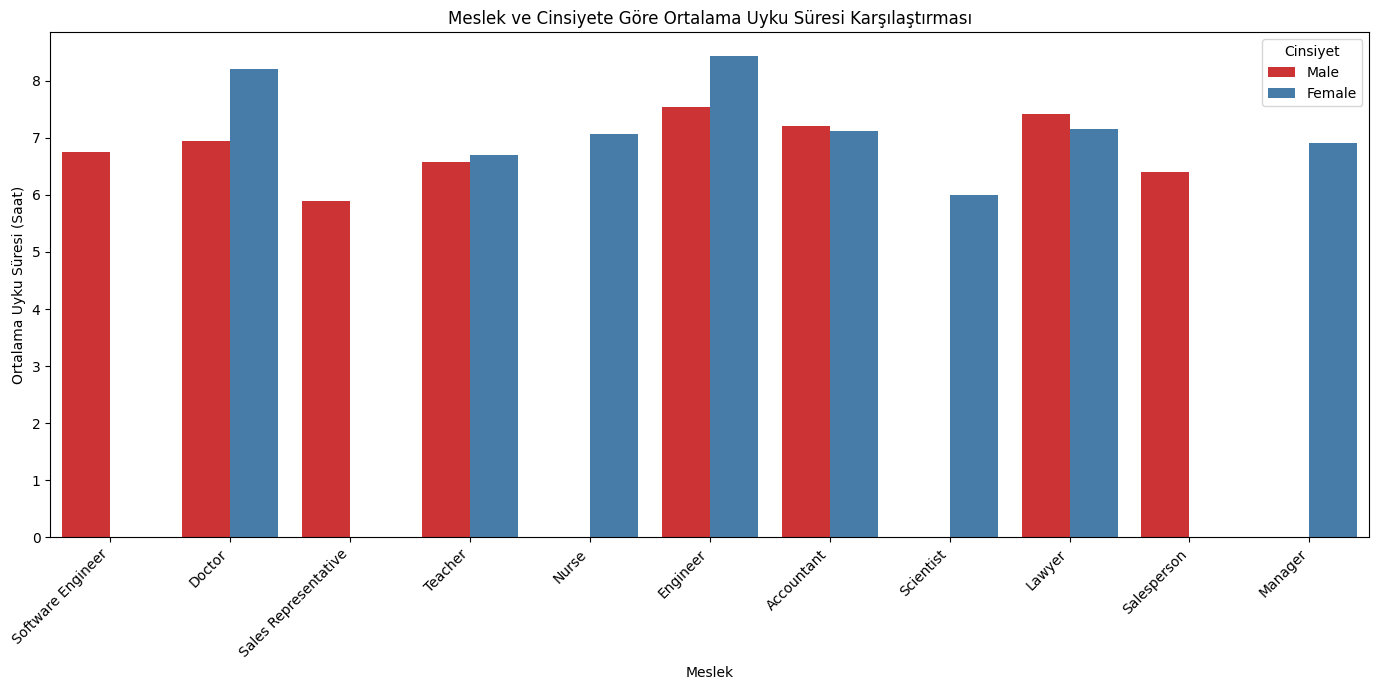

In [142]:
#g-4(Meslek ve Cinsiyete Göre Ortalama Uyku Süresi)
plt.figure(figsize=(14, 7))
sns.barplot(x='Meslek', y='Uyku Süresi', hue='Cinsiyet', data=my_frame, palette='Set1', errorbar=None)
plt.title('Meslek ve Cinsiyete Göre Ortalama Uyku Süresi Karşılaştırması')
plt.xlabel('Meslek')
plt.ylabel('Ortalama Uyku Süresi (Saat)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()
plt.savefig('meslek_cinsiyet_uyku.png')
plt.close()

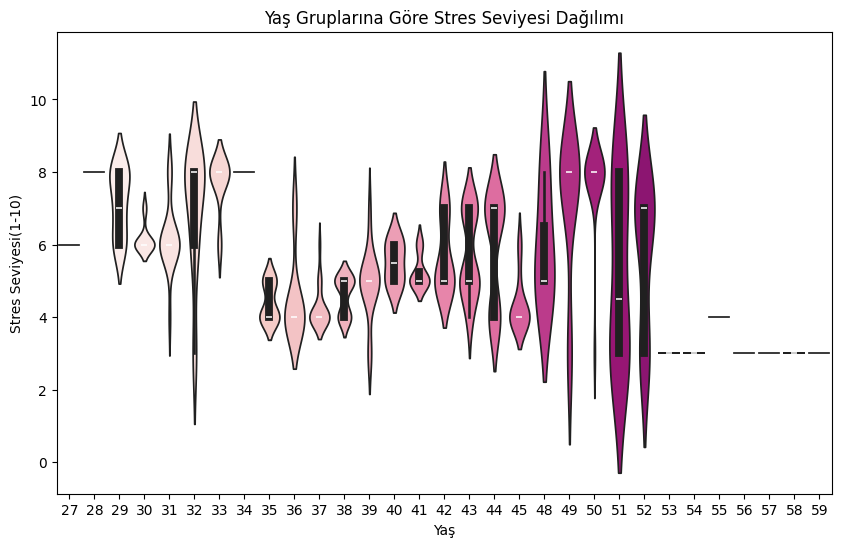

In [143]:
#g-5(Yaş Gruplarına Göre Stres Seviyesi Dağılımı)
plt.figure(figsize=(10,6))
sns.violinplot(x='Yaş', y='Stres Seviyesi', data=my_frame,
               hue='Yaş', legend=False, palette='RdPu')
plt.title('Yaş Gruplarına Göre Stres Seviyesi Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Stres Seviyesi(1-10)')
plt.show()
plt.savefig('yas_gruplarina_gore_stres_seviyesi_dagilimi.png')
plt.close()

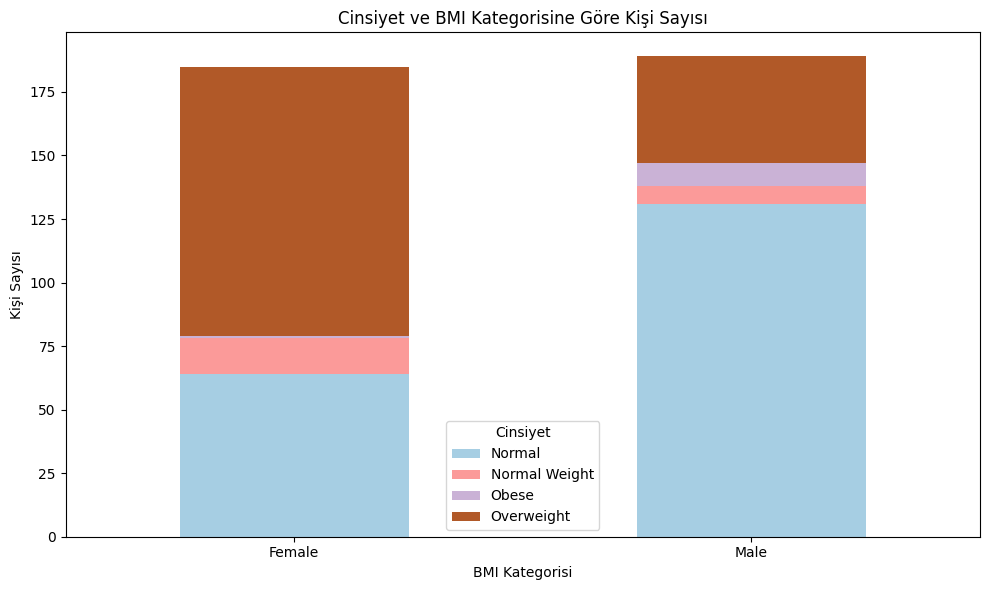

In [144]:
#g-6(Cinsiyet ve BMI Kategorisine Göre Kişi Sayısı)
kisi_sayisi=my_frame.groupby(['Cinsiyet', 'BMI Kategorisi']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
kisi_sayisi.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Paired')
plt.title('Cinsiyet ve BMI Kategorisine Göre Kişi Sayısı')
plt.xlabel('BMI Kategorisi')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=0)
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()
plt.savefig('cinsiyet_bmi_kategorisine_gore_kisi_sayisi.png')
plt.close()

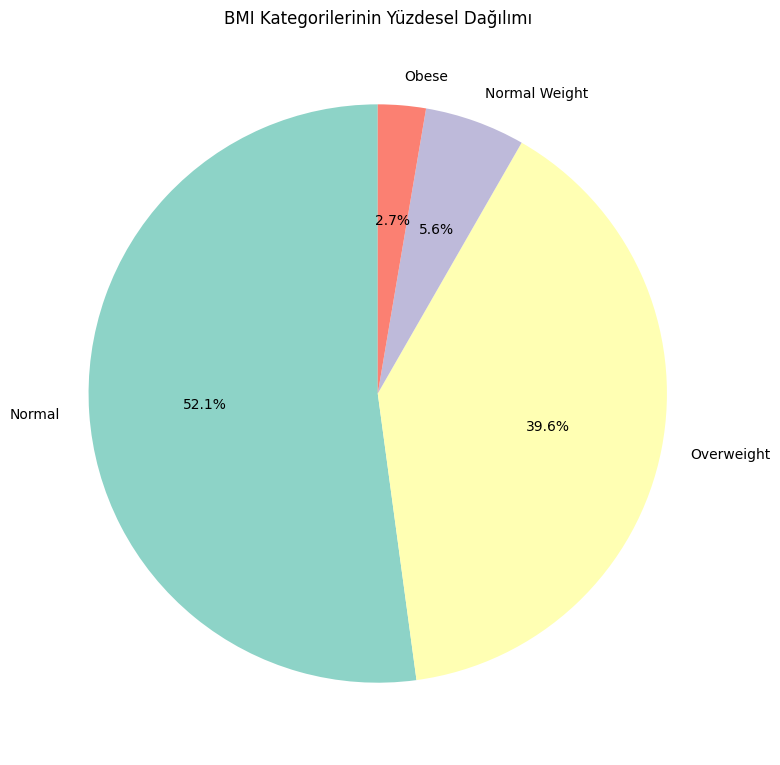

In [145]:
#g-7(BMI Kategorisi Dağılımı)
plt.figure(figsize=(8, 8))
my_frame['BMI Kategorisi'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('BMI Kategorilerinin Yüzdesel Dağılımı')
plt.ylabel('')
plt.tight_layout()
plt.show()
plt.savefig('bmi_kategorisi_dagilimi.png')
plt.close()

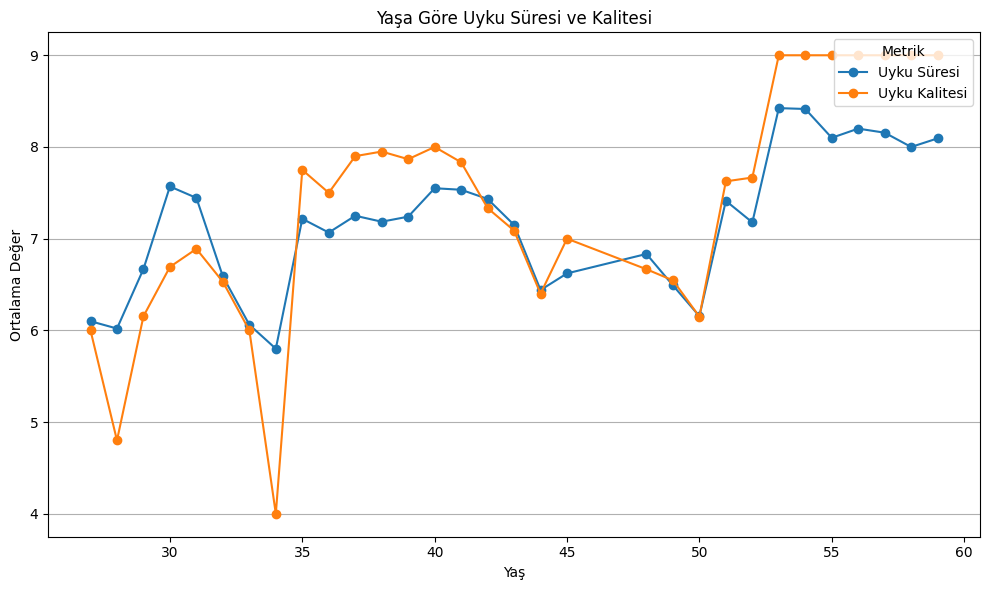

In [146]:
#g-8(Yaşa Göre Uyku Süresi ve Kalitesi)
plt.figure(figsize=(10, 6))
df_trend = my_frame.groupby('Yaş')[['Uyku Süresi', 'Uyku Kalitesi']].mean()
df_trend.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Yaşa Göre Uyku Süresi ve Kalitesi')
plt.xlabel('Yaş')
plt.ylabel('Ortalama Değer')
plt.legend(title='Metrik', loc='upper right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
plt.savefig('yas_uyku_kalitesi.png')
plt.close()

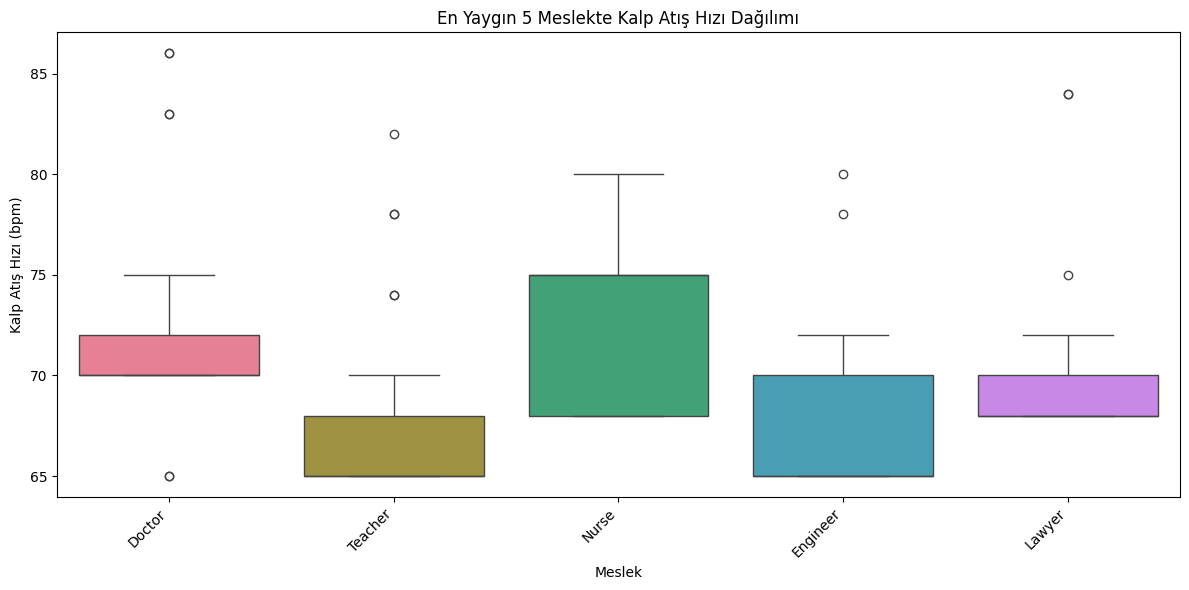

In [147]:
#g-9(En Yaygın 5 Meslekte Kalp Atış Hızı Dağılımı)
plt.figure(figsize=(12, 6))
top_5_meslek=my_frame['Meslek'].value_counts().head(5).index
filtered_data=my_frame[my_frame['Meslek'].isin(top_5_meslek)]
sns.boxplot(x='Meslek', y='Kalp Atış Hızı', data=filtered_data,
            hue='Meslek', legend=False, palette='husl')
plt.title('En Yaygın 5 Meslekte Kalp Atış Hızı Dağılımı')
plt.xlabel('Meslek')
plt.ylabel('Kalp Atış Hızı (bpm)')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()
plt.savefig('en_yaygin_5_meslek_kalp_hizi.png')
plt.close()

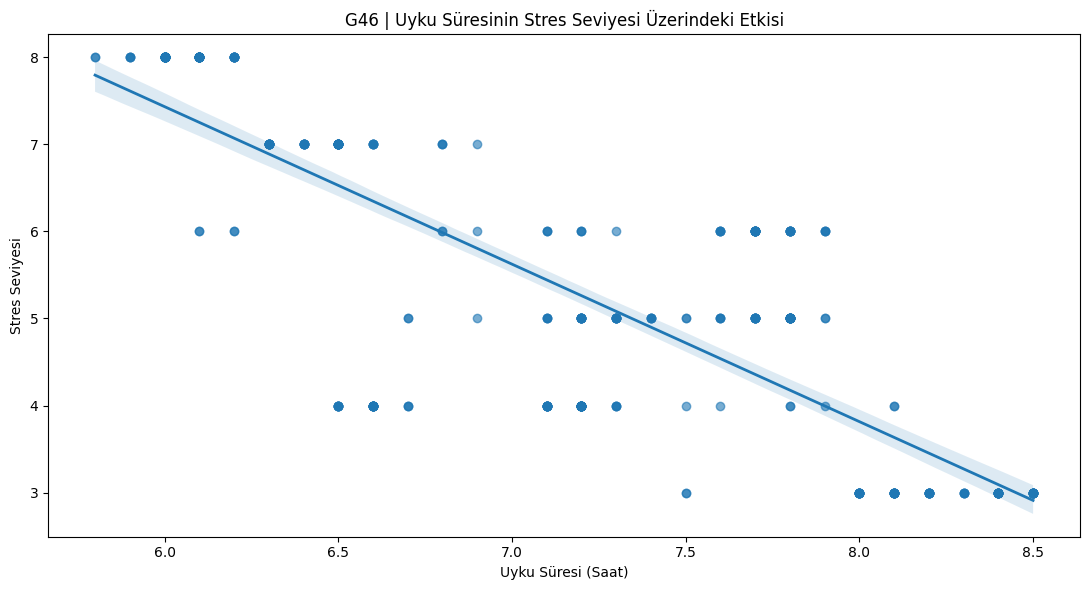

In [148]:
#g-10(Uyku Süresinin Stres Seviyesine Etkisi)
plt.figure(figsize=(11, 6))
sns.regplot(
    data=my_frame,
    x='Uyku Süresi',
    y='Stres Seviyesi',
    scatter_kws={'alpha':0.6},
    line_kws={'linewidth':2}
)
plt.title('G46 | Uyku Süresinin Stres Seviyesi Üzerindeki Etkisi')
plt.xlabel('Uyku Süresi (Saat)')
plt.ylabel('Stres Seviyesi')
plt.tight_layout()
plt.show()
plt.savefig('uyku_suresi_stres_seviyesi.png')
plt.close()

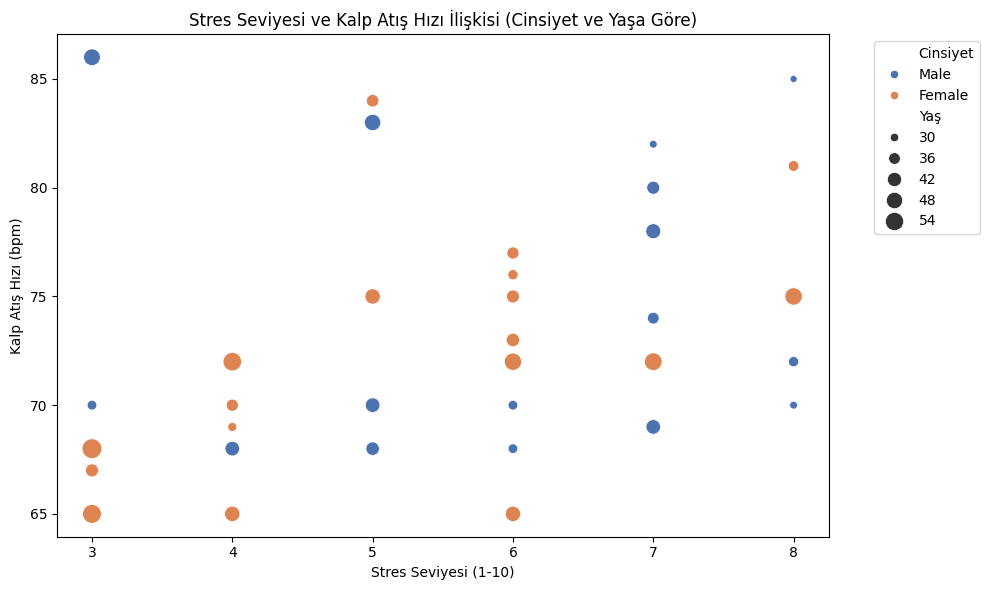

In [149]:
#g-11(Stres Seviyesi ve Kalp Atış Hızı İlişkisi)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stres Seviyesi', y='Kalp Atış Hızı', hue='Cinsiyet', data=my_frame, palette='deep', size='Yaş', sizes=(20, 200))
plt.title('Stres Seviyesi ve Kalp Atış Hızı İlişkisi (Cinsiyet ve Yaşa Göre)')
plt.xlabel('Stres Seviyesi (1-10)')
plt.ylabel('Kalp Atış Hızı (bpm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()
plt.savefig('stres_kalp_hizi_iliskisi.png')
plt.close()

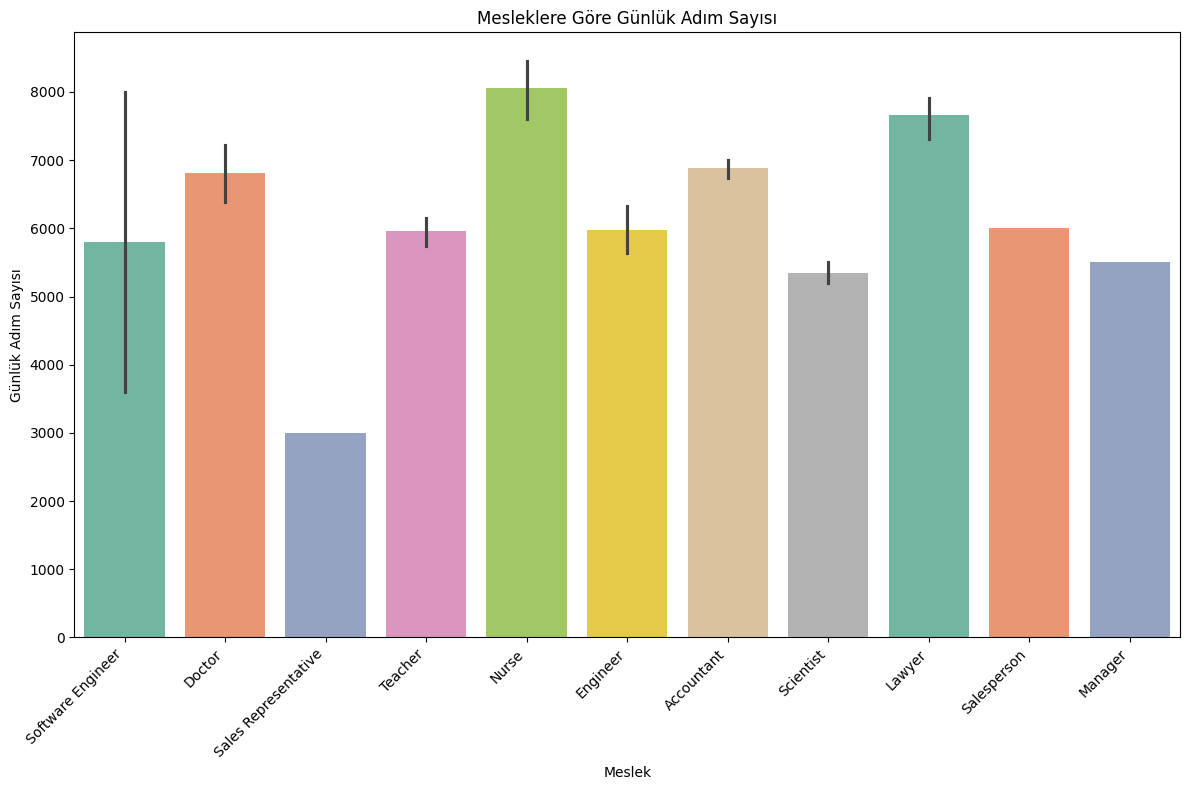

In [150]:
#g-12(Mesleklere göre günlük adım sayısı)
plt.figure(figsize=(12,8))
sns.barplot(x='Meslek', y='Günlük Adım Sayısı', data=my_frame,hue='Meslek', palette='Set2',legend=False)
plt.title('Mesleklere Göre Günlük Adım Sayısı')
plt.xlabel('Meslek')
plt.ylabel('Günlük Adım Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('meslek_gunluk_adım_sayisi.png')
plt.close()